<a href="https://colab.research.google.com/github/FK04/AI-ML--Lab/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
uploaded = files.upload()

Saving BA_AirlineReviews.csv to BA_AirlineReviews.csv


In [ ]:
# Load your CSV file
df = pd.read_csv('BA_AirlineReviews.csv')

In [ ]:
# Extract features (X) by excluding the target variable
X = df.drop(columns=df.columns[-1]).values

# Extract the target variable (y) from the last column
y = df[df.columns[-1]].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'Review' is the column containing text data
text_data = df['VerifiedReview'].astype(str)

# Use CountVectorizer to convert text into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Convert sparse matrix to dense array
X = X.toarray()

# Assuming 'label' is the column containing target variable
y = df['OverallRating']

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

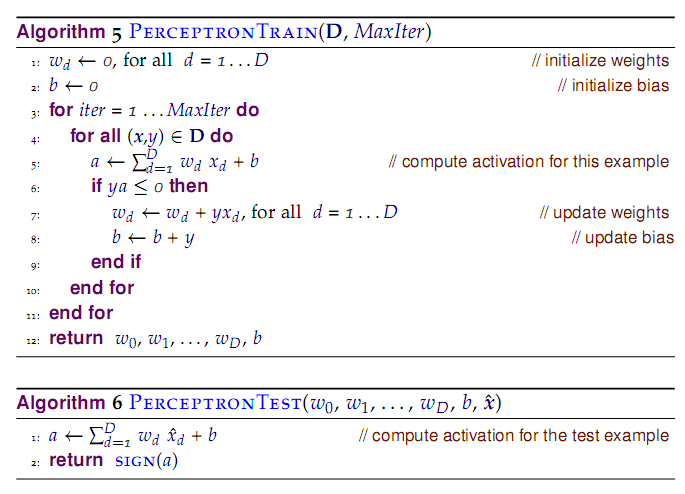

The algorithm is shown in the above image.

In [ ]:
# Convert multi-class ratings to binary (positive or negative)
y_binary = (y >= 4).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.5, random_state=42)

# Create the StandardScaler with with_mean=False
scaler = StandardScaler(with_mean=False)

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Ensure y_train is a two-dimensional array
y_train = y_train.values.reshape(-1, 1)

In [ ]:
def perceptron_algo(X, Y, epochs=100, eta=0.01):
    # Add a bias term to the input data
    bias_term = np.ones((X.shape[0], 1))
    X_with_bias = np.concatenate((bias_term, X), axis=1)

    # Check if Y is one-dimensional, and reshape if needed
    if len(Y.shape) == 1:
        Y = Y.reshape(-1, 1)

    # Initialize the weight vector with bias term
    w = np.zeros(X_with_bias.shape[1])

    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X_with_bias):
            if (np.dot(x, w) * Y[i]) <= 0:
                total_error += (np.dot(x, w) * Y[i])
                w = w + eta * x * Y[i]
        errors.append(total_error * -1)

    return w, errors

Next, we will see the the training error at each epoch.

In [ ]:
# Train perceptron
w, errors = perceptron_algo(X_train_scaled, y_train, epochs=1000, eta=0.01)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

Text(0, 0.5, 'Feature 2 (standardized')

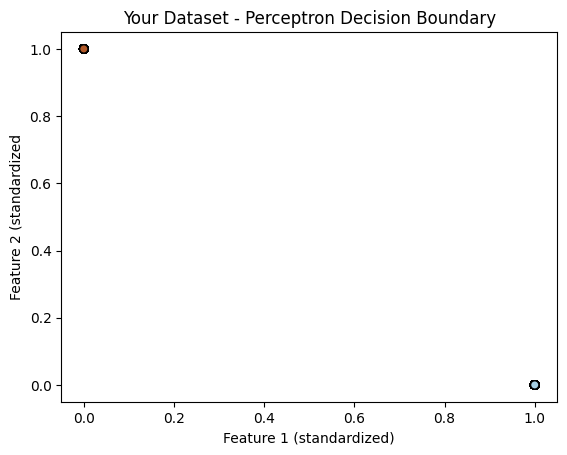

In [ ]:
# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', marker='o')
plt.title('Your Dataset - Perceptron Decision Boundary')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized')

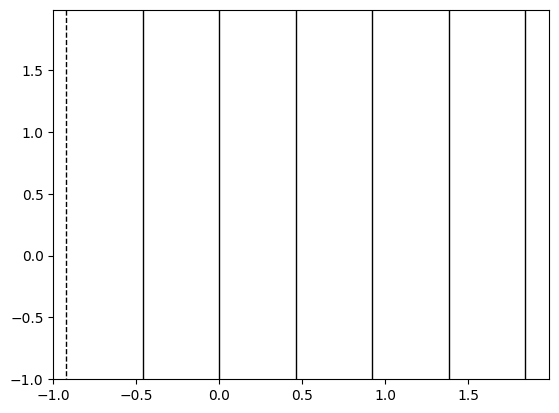

In [ ]:
# Plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], w)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', linewidths=1)
plt.show()

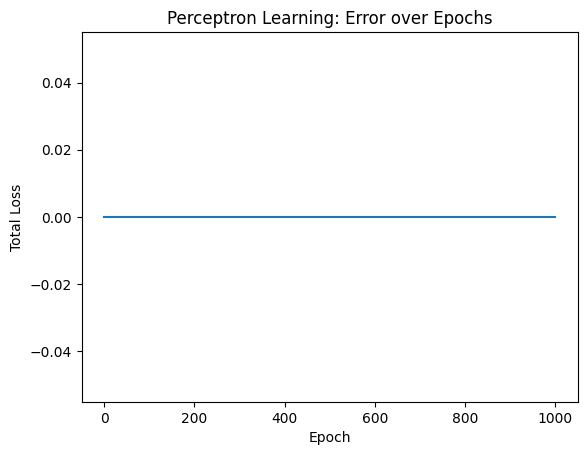

In [ ]:
# Plot the error over epochs
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Learning: Error over Epochs')
plt.show()

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 2, -1],
    [8, 6, -1],
    [10, 4, -1],
    [6, 12, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

In [4]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

[-6.  0. 11.]


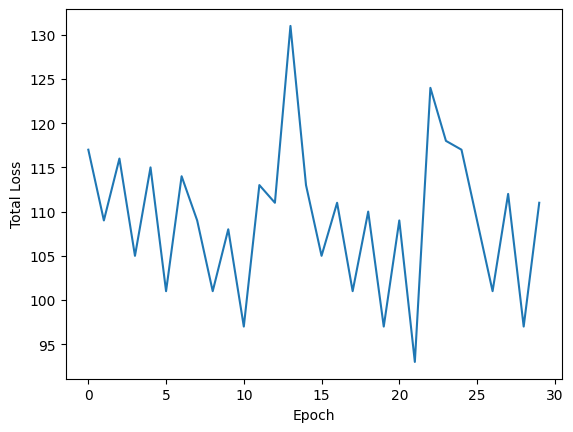

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

In [5]:
#Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from google.colab import files

In [6]:
uploaded = files.upload()

# Load Banknote Authentication dataset (replace 'banknote-authentication.csv' with the actual file name)
data = pd.read_csv('banknote-authentication.csv (1).xls')

Saving banknote-authentication.csv.xls to banknote-authentication.csv (3).xls


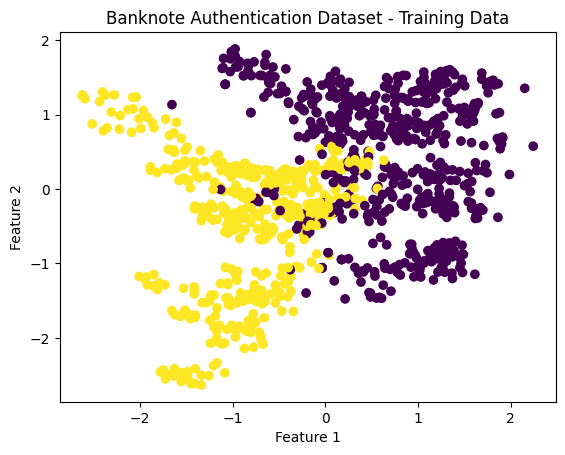

Accuracy on the test set: 46.18%


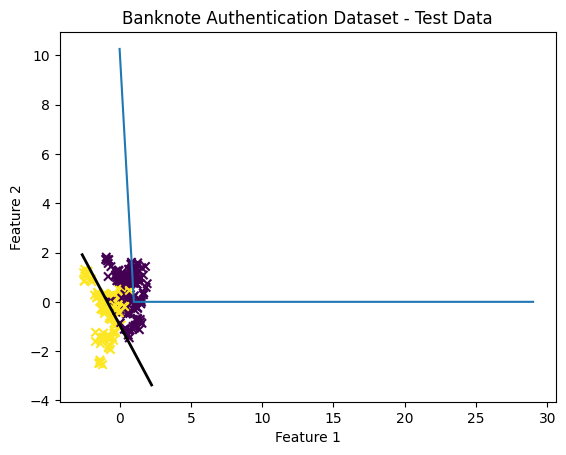

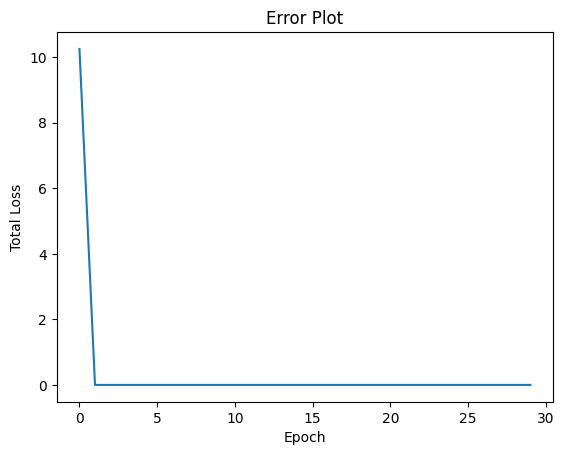

In [7]:
# Assuming the target variable is in the column named 'class' (replace with the actual column name)
X = data.drop('class', axis=1).values  # Features
y = data['class'].values  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Banknote Authentication Dataset - Training Data')
plt.show()

# Train the perceptron and plot the total loss
w = perceptron_algo_plot(X_train, y_train)

# Plot the decision boundary
plt.plot([np.min(X_train[:, 0]), np.max(X_train[:, 0])], [-(w[0] + w[1]*np.min(X_train[:, 0]))/w[2], -(w[0] + w[1]*np.max(X_train[:, 0]))/w[2]], 'k-', lw=2)

# Add test samples
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Banknote Authentication Dataset - Test Data')

# Evaluate accuracy on the test set
y_pred = np.sign(np.dot(X_test, w))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Show the error plot
plt.figure()
perceptron_algo_plot(X_train, y_train)
plt.title('Error Plot')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()


In [8]:
#Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
# Experiment with different learning rates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

<ipython-input-9-af0a4f615a3a>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(learning_rates), learning_rates.index(eta) + 1)


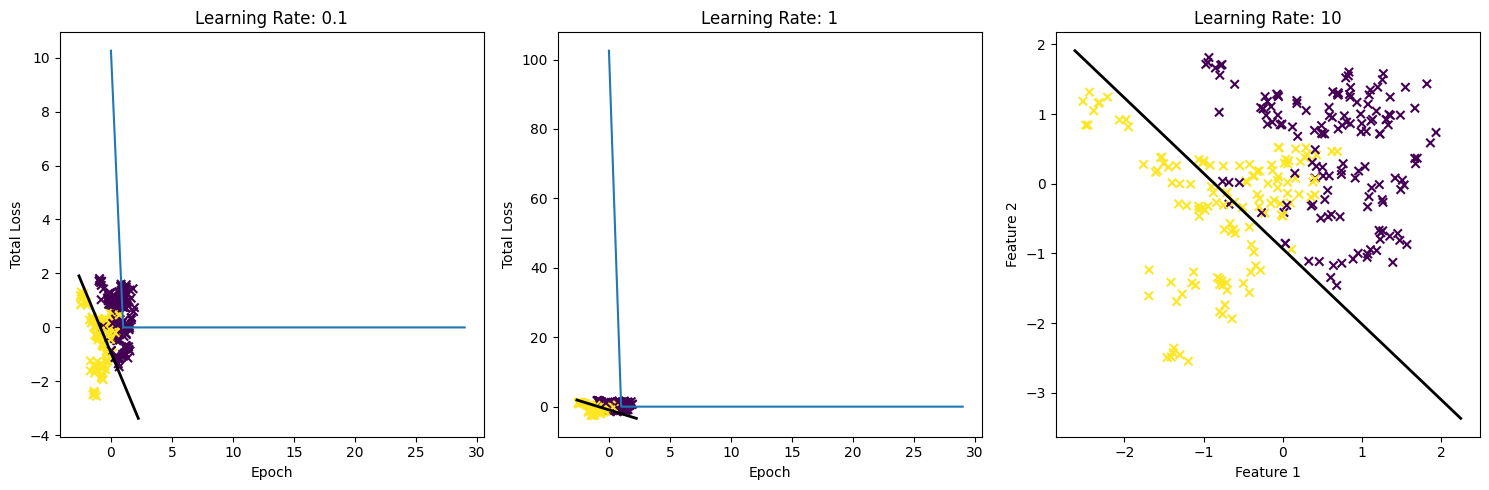

In [9]:
# Perceptron algorithm using our update rule
def perceptron_algo(X, Y, eta=1):
    w = np.zeros(len(X[0]))
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

def perceptron_algo_plot(X, Y, eta=1):
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

# Load Banknote Authentication dataset (replace 'banknote-authentication.csv' with the actual file name)
# ... (same as previous code)

# Experiment with different learning rates
learning_rates = [0.1, 1, 10]

plt.figure(figsize=(15, 5))

for eta in learning_rates:
    w = perceptron_algo_plot(X_train, y_train, eta=eta)

    plt.subplot(1, len(learning_rates), learning_rates.index(eta) + 1)

    # Plot the decision boundary
    plt.plot([np.min(X_train[:, 0]), np.max(X_train[:, 0])], [-(w[0] + w[1]*np.min(X_train[:, 0]))/w[2], -(w[0] + w[1]*np.max(X_train[:, 0]))/w[2]], 'k-', lw=2)

    # Add test samples
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x')

    plt.title(f'Learning Rate: {eta}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

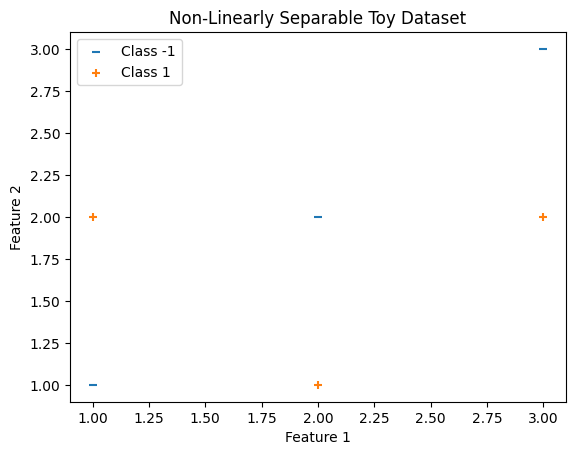

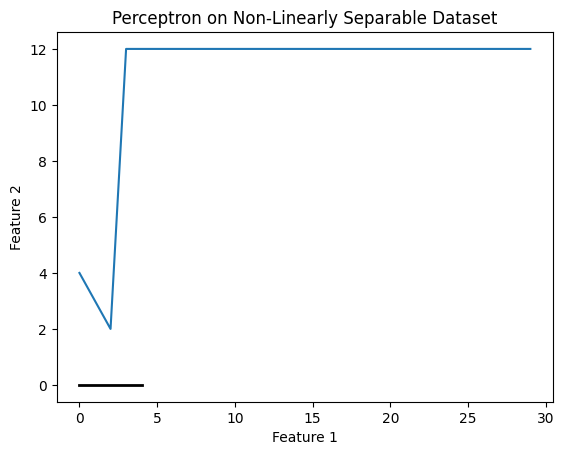

In [10]:
#Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations.
# Create a non-linearly separable toy dataset
X_non_linear = np.array([
    [1, 1, -1],
    [2, 2, -1],
    [3, 3, -1],
    [1, 2, -1],
    [2, 1, -1],
    [3, 2, -1],
])
y_non_linear = np.array([-1, -1, -1, 1, 1, 1])

# Plot the non-linearly separable toy dataset
plt.scatter(X_non_linear[y_non_linear == -1][:, 0], X_non_linear[y_non_linear == -1][:, 1], marker='_', label='Class -1')
plt.scatter(X_non_linear[y_non_linear == 1][:, 0], X_non_linear[y_non_linear == 1][:, 1], marker='+', label='Class 1')
plt.title('Non-Linearly Separable Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Run perceptron algorithm on non-linearly separable dataset
w_non_linear = perceptron_algo_plot(X_non_linear, y_non_linear)

# Plot the decision boundary
plt.plot([0, 4], [-w_non_linear[2]/w_non_linear[1], -(w_non_linear[2] + 4*w_non_linear[0])/w_non_linear[1]], 'k-', lw=2)
plt.title('Perceptron on Non-Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()